<a href="https://colab.research.google.com/github/saeedamiri1997/Deep-Residual-Unet-image-processing/blob/master/Deep%20Residual%20UNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Residual U-Net (ResUNet)
Paper: https://arxiv.org/pdf/1711.10684.pdf

ResUNet, a semantic segmentation model inspired by the deep residual learning and UNet. An architecture that take advantages from both(Residual and UNet) models.

## 1.1 Advantages
<ol>
    <li>The residual unit will ease the training of the network.</li>
    <li>The skip connections within a residual unit and between low levels and high levels of the network will facilitate information propagation without degradation,making it possible to design a neural network with much fewer
parameters.</li>
</ol>

## 1.2 Architecture

### 1.2.1 Basic Buildig Block
The ResUNet uses Residual Units as basic building block instead of plain convolutional block.
<br/>
<ol>
    <li>Residual units consists of:</li>
<ol>
    <li>Two 3x3 convolutional block.</li>
    <li>An identity mapping.</li>                                 
</ol>

The Identity Mapping connects the input and output of the Residual unit.
<br/><br/>

<li>Convolutional block consists of:</li>
<ol>
    <li>One Batch Normalization layer.</li>
    <li>One ReLU Activation layer.</li>
    <li>One Convolutional layer.</li>
</ol>

</ol>
    
<img src="https://github.com/saeedamiri1997/Deep-Residual-Unet-image-processing/blob/master/images/basic%20block.png?raw=1">

### 1.2.3 Complete Architecture

The ResUNet consists of three parts:
<ol>
    <li>Encoding</li>
    <li>Bridge</li>
    <li>Decoding</li>
</ol>

<ul>
<li>
In encoding units, instead of using pooling operation to downsample feature map size, a stride of 2 is applied to the first convolution block to reduce the feature map by half.
</li>

<li>
Before each decoding unit, there is an up-sampling of feature maps from lower level and a concatenation with the feature maps from the corresponding encoding path.
</li>

<li>
At last a 1x1 Convolution is applied with Sigmoid activation to obtain a desired segmentation map.
</li>
</ul>

<img src="https://github.com/saeedamiri1997/Deep-Residual-Unet-image-processing/blob/master/images/arch.png?raw=1">

## 1.3 Loss
Mean Squared Error(MSE) is used as the loss function

<img src="https://github.com/saeedamiri1997/Deep-Residual-Unet-image-processing/blob/master/images/loss.png?raw=1">

<ul>
<li>N = Number of training samples</li>
<li>Net(I<sub>w</sub>;W) = Predicted Segmentation Map</li>
<li>s<sub>i</sub> = Ground Tructh Segmentaton Map</li>
</ul>

## 1.4 Result

<img src="https://github.com/saeedamiri1997/Deep-Residual-Unet-image-processing/blob/master/images/result.png?raw=1">

## 1.4 Dataset
Kaggle TGS Salt Identification Challenge: https://www.kaggle.com/c/tgs-salt-identification-challenge

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"forozo","key":"da15ffdcaa325a476d90d7b795b1924d"}'}

In [2]:
import os
import zipfile

# Move kaggle.json to the correct directory
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Verify Kaggle is set up
!kaggle datasets list

ref                                                               title                                         size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------------  -------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
asinow/car-price-dataset                                          Car Price Dataset                            135KB  2025-01-26 19:53:28          11231        154  1.0              
adilshamim8/education-and-career-success                          Education & Career Success.                  118KB  2025-02-03 05:24:20           2451         45  1.0              
anandshaw2001/netflix-movies-and-tv-shows                         Netflix Movies and TV Shows                    1MB  2025-01-03 10:33:01          19437        480  1.0              
hubertsidorowicz/football-players-stats-2024-2025                 Football Players St

In [3]:
!kaggle competitions download -c tgs-salt-identification-challenge

 99% 440M/445M [00:03<00:00, 139MB/s]
100% 445M/445M [00:03<00:00, 117MB/s]


In [5]:
!unzip tgs-salt-identification-challenge.zip -d dataset

Archive:  tgs-salt-identification-challenge.zip
  inflating: dataset/competition_data.zip  
  inflating: dataset/depths.csv      
  inflating: dataset/flamingo.zip    
  inflating: dataset/sample_submission.csv  
  inflating: dataset/test.zip        
  inflating: dataset/train.csv       
  inflating: dataset/train.zip       


In [6]:
!unzip /content/dataset/train.zip -d /content/dataset/train

Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/train/images/d80ead8703.png  
  inflating: /content/dataset/train/images/b012e9ebb0.png  
  inflating: /content/dataset/train/images/d3034e7a60.png  
  inflating: /content/dataset/train/images/ae2ef70d51.png  
  inflating: /content/dataset/train/images/1af44a9db0.png  
  inflating: /content/dataset/train/images/41cfd4b320.png  
  inflating: /content/dataset/train/images/853e89d0d3.png  
  inflating: /content/dataset/train/images/2a484baa26.png  
  inflating: /content/dataset/train/images/92e617896e.png  
  inflating: /content/dataset/train/images/b70f0ab0c2.png  
  inflating: /content/dataset/train/images/e8757626a1.png  
  inflating: /content/dataset/train/images/6a3d92ce59.png  
  inflating: /content/dataset/train/images/127ef4105f.png  
  inflating: /content/dataset/train/images/d21012f5c1.png  
  inflating: /content/dataset/train/images/1cb9549d2c.png  
  inflating: /content/dataset/train/images/e030bd

In [7]:
!unzip /content/dataset/test.zip -d /content/dataset/test

Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/test/images/a3df74dd31.png  
  inflating: /content/dataset/test/images/187ecc32d5.png  
  inflating: /content/dataset/test/images/54538419f5.png  
  inflating: /content/dataset/test/images/93614d4b95.png  
  inflating: /content/dataset/test/images/50a91adce8.png  
  inflating: /content/dataset/test/images/97d23cea10.png  
  inflating: /content/dataset/test/images/ca04c19c0b.png  
  inflating: /content/dataset/test/images/d168218bac.png  
  inflating: /content/dataset/test/images/a670e833a4.png  
  inflating: /content/dataset/test/images/a964a0f499.png  
  inflating: /content/dataset/test/images/371bf59030.png  
  inflating: /content/dataset/test/images/fc74f77bae.png  
  inflating: /content/dataset/test/images/f63dc1e3be.png  
  inflating: /content/dataset/test/images/b807539a5f.png  
  inflating: /content/dataset/test/images/1dfcbf4bca.png  
  inflating: /content/dataset/test/images/a971d2ae53.png  
  inf

In [8]:
## Imports
import os
import sys
import random

import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

## Seeding
seed = 2019
random.seed = seed
np.random.seed = seed
tf.seed = seed

## Path

In [9]:
dataset_path = "/content/dataset/"
train_path = os.path.join(dataset_path, "train/")

## Data Generator

In [10]:
class DataGen(keras.utils.Sequence):
    def __init__(self, ids, path, batch_size=8, image_size=128):
        self.ids = ids
        self.path = path
        self.batch_size = batch_size
        self.image_size = image_size
        self.on_epoch_end()

    def __load__(self, id_name):
        ## Path
        image_path = os.path.join(self.path, "images", id_name) + ".png"
        mask_path = os.path.join(self.path, "masks", id_name) + ".png"

        ## Reading Image
        image = cv2.imread(image_path)
        image = cv2.resize(image, (self.image_size, self.image_size))

        ##Reading Mask
        mask = cv2.imread(mask_path, 0)
        mask = cv2.resize(mask, (self.image_size, self.image_size))
        mask = np.expand_dims(mask, axis=-1)

        ## Normalizaing
        image = image/255.0
        mask = mask/255.0

        return image, mask

    def __getitem__(self, index):
        if(index+1)*self.batch_size > len(self.ids):
            self.batch_size = len(self.ids) - index*self.batch_size

        files_batch = self.ids[index*self.batch_size : (index+1)*self.batch_size]

        image = []
        mask  = []

        for id_name in files_batch:
            _img, _mask = self.__load__(id_name)
            image.append(_img)
            mask.append(_mask)

        image = np.array(image)
        mask  = np.array(mask)

        return image, mask

    def on_epoch_end(self):
        pass

    def __len__(self):
        return int(np.ceil(len(self.ids)/float(self.batch_size)))

## Hyperparameters

In [11]:
train_csv = pd.read_csv(dataset_path + "train.csv")
train_ids = train_csv["id"].values

image_size = 128
batch_size = 16

val_data_size = 200

valid_ids = train_ids[:val_data_size]
train_ids = train_ids[val_data_size:]

In [12]:
gen = DataGen(train_ids, train_path, batch_size=batch_size, image_size=image_size)
x, y = gen.__getitem__(0)
print(x.shape, y.shape)

(16, 128, 128, 3) (16, 128, 128, 1)


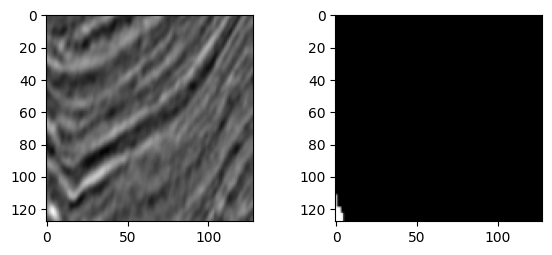

In [13]:
r = random.randint(0, len(x)-1)

fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot(1, 2, 1)
ax.imshow(x[r])
ax = fig.add_subplot(1, 2, 2)
ax.imshow(np.reshape(y[r]*255, (image_size, image_size)), cmap="gray")

## Different Blocks

In [14]:
def bn_act(x, act=True):
    x = keras.layers.BatchNormalization()(x)
    if act == True:
        x = keras.layers.Activation("relu")(x)
    return x

def conv_block(x, filters, kernel_size=(3, 3), padding="same", strides=1):
    conv = bn_act(x)
    conv = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides)(conv)
    return conv

def stem(x, filters, kernel_size=(3, 3), padding="same", strides=1):
    conv = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides)(x)
    conv = conv_block(conv, filters, kernel_size=kernel_size, padding=padding, strides=strides)

    shortcut = keras.layers.Conv2D(filters, kernel_size=(1, 1), padding=padding, strides=strides)(x)
    shortcut = bn_act(shortcut, act=False)

    output = keras.layers.Add()([conv, shortcut])
    return output

def residual_block(x, filters, kernel_size=(3, 3), padding="same", strides=1):
    res = conv_block(x, filters, kernel_size=kernel_size, padding=padding, strides=strides)
    res = conv_block(res, filters, kernel_size=kernel_size, padding=padding, strides=1)

    shortcut = keras.layers.Conv2D(filters, kernel_size=(1, 1), padding=padding, strides=strides)(x)
    shortcut = bn_act(shortcut, act=False)

    output = keras.layers.Add()([shortcut, res])
    return output

def upsample_concat_block(x, xskip):
    u = keras.layers.UpSampling2D((2, 2))(x)
    c = keras.layers.Concatenate()([u, xskip])
    return c

## ResUNet

In [15]:
def ResUNet():
    f = [16, 32, 64, 128, 256]
    inputs = keras.layers.Input((image_size, image_size, 3))

    ## Encoder
    e0 = inputs
    e1 = stem(e0, f[0])
    e2 = residual_block(e1, f[1], strides=2)
    e3 = residual_block(e2, f[2], strides=2)
    e4 = residual_block(e3, f[3], strides=2)
    e5 = residual_block(e4, f[4], strides=2)

    ## Bridge
    b0 = conv_block(e5, f[4], strides=1)
    b1 = conv_block(b0, f[4], strides=1)

    ## Decoder
    u1 = upsample_concat_block(b1, e4)
    d1 = residual_block(u1, f[4])

    u2 = upsample_concat_block(d1, e3)
    d2 = residual_block(u2, f[3])

    u3 = upsample_concat_block(d2, e2)
    d3 = residual_block(u3, f[2])

    u4 = upsample_concat_block(d3, e1)
    d4 = residual_block(u4, f[1])

    outputs = keras.layers.Conv2D(1, (1, 1), padding="same", activation="sigmoid")(d4)
    model = keras.models.Model(inputs, outputs)
    return model

In [19]:
smooth = 1.

def dice_coef(y_true, y_pred):
    y_true_f = tf.keras.layers.Flatten()(y_true)
    y_pred_f = tf.keras.layers.Flatten()(y_pred)
    intersection = tf.reduce_sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (tf.reduce_sum(y_true_f) + tf.reduce_sum(y_pred_f) + smooth)


def dice_coef_loss(y_true, y_pred):
    return 1.0 - dice_coef(y_true, y_pred)

In [20]:
model = ResUNet()
adam = keras.optimizers.Adam()
model.compile(optimizer=adam, loss=dice_coef_loss, metrics=[dice_coef])
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 128, 128, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_30 (Conv2D)        │ (None, 128, 128, 16)   │            448 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_28    │ (None, 128, 128, 16)   │             64 │ conv2d_30[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_19             │ (None, 128, 128, 16)   │              0 │ batch_normalization_2… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_32 (Conv2D)        │ (None, 128, 128, 16)   │             64 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_31 (Conv2D)        │ (None, 128, 128, 16)   │          2,320 │ activation_19[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_29    │ (None, 128, 128, 16)   │             64 │ conv2d_32[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_9 (Add)               │ (None, 128, 128, 16)   │              0 │ conv2d_31[0][0],       │
│                           │                        │                │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_30    │ (None, 128, 128, 16)   │             64 │ add_9[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_20             │ (None, 128, 128, 16)   │              0 │ batch_normalization_3… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_33 (Conv2D)        │ (None, 64, 64, 32)     │          4,640 │ activation_20[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_31    │ (None, 64, 64, 32)     │            128 │ conv2d_33[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_35 (Conv2D)        │ (None, 64, 64, 32)     │            544 │ add_9[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_21             │ (None, 64, 64, 32)     │              0 │ batch_normalization_3… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_32    │ (None, 64, 64, 32)     │            128 │ conv2d_35[0][0]        │
│ (BatchNormalization) 

 Total params: 4,723,057 (18.02 MB)

 Trainable params: 4,715,761 (17.99 MB)

 Non-trainable params: 7,296 (28.50 KB)

## Training

In [21]:
train_gen = DataGen(train_ids, train_path, image_size=image_size, batch_size=batch_size)
valid_gen = DataGen(valid_ids, train_path, image_size=image_size, batch_size=batch_size)

train_steps = len(train_ids)//batch_size
valid_steps = len(valid_ids)//batch_size

epochs = 10

model.fit(train_gen, validation_data=valid_gen, steps_per_epoch=train_steps, validation_steps=valid_steps,
          epochs=epochs)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


237/237 ━━━━━━━━━━━━━━━━━━━━ 84s 184ms/step - dice_coef: 0.5944 - loss: 0.4055 - val_dice_coef: 0.4700 - val_loss: 0.5300
Epoch 2/10
  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - dice_coef: 0.8625 - loss: 0.1375

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


237/237 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - dice_coef: 0.8625 - loss: 0.1375 - val_dice_coef: 0.4518 - val_loss: 0.5482
Epoch 3/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 27s 55ms/step - dice_coef: 0.6871 - loss: 0.3129 - val_dice_coef: 0.4381 - val_loss: 0.5619
Epoch 4/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 846us/step - dice_coef: 0.8931 - loss: 0.1069 - val_dice_coef: 0.4263 - val_loss: 0.5737
Epoch 5/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - dice_coef: 0.6522 - loss: 0.3478 - val_dice_coef: 0.0149 - val_loss: 0.9851
Epoch 6/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - dice_coef: 0.8272 - loss: 0.1728 - val_dice_coef: 0.0081 - val_loss: 0.9919
Epoch 7/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 13s 55ms/step - dice_coef: 0.6645 - loss: 0.3355 - val_dice_coef: 0.7578 - val_loss: 0.2422
Epoch 8/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step - dice_coef: 0.5646 - loss: 0.4354 - val_dice_coef: 0.7566 - val_loss: 0.2434
Epoch 9/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 20s 56ms/step - dice_coef: 0.6867 - loss: 0.3133 -

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [28]:
model.save_weights("ResUNet.weights.h5")

In [29]:
model.save("ResUNet.h5")  # Saves the full model, not just weights


      Ground Truth            Predicted Value
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


<ipython-input-30-312bed8f21fa>:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


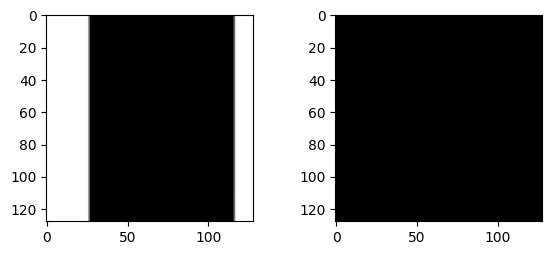

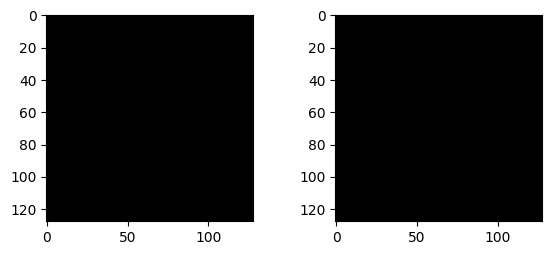

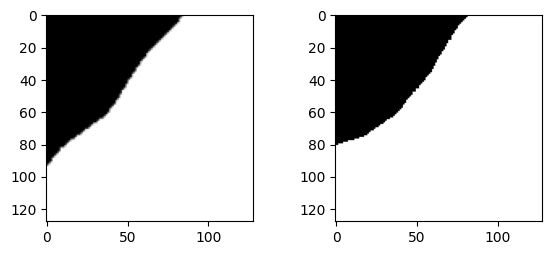

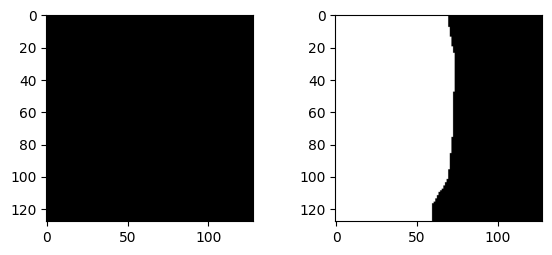

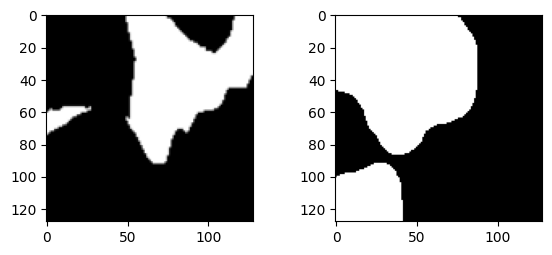

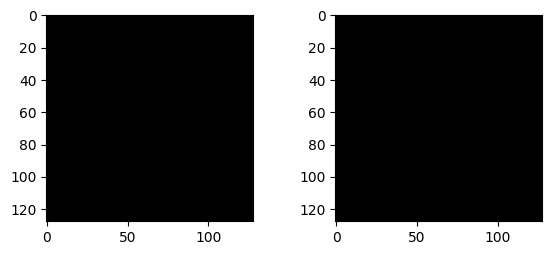

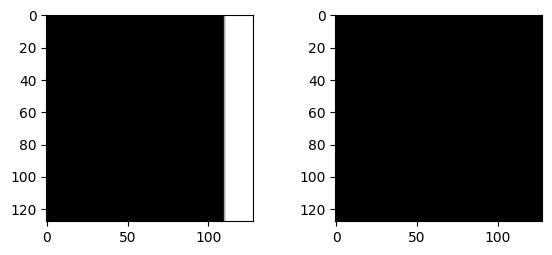

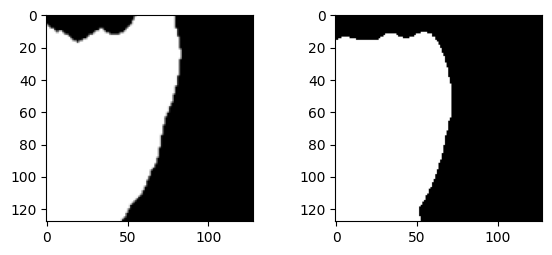

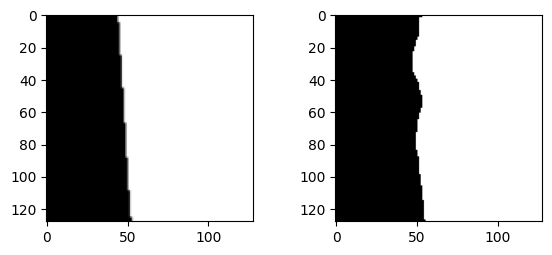

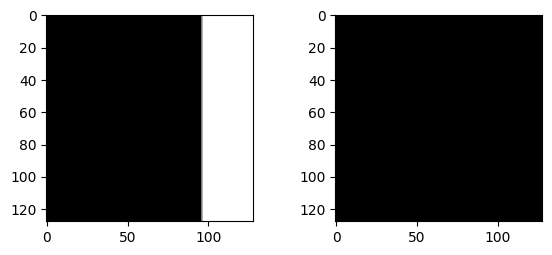

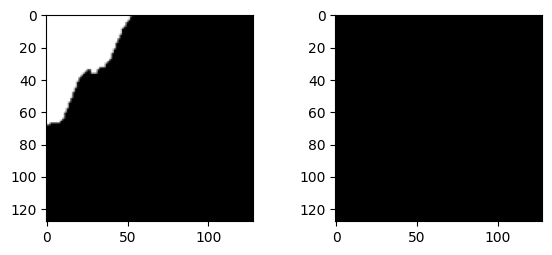

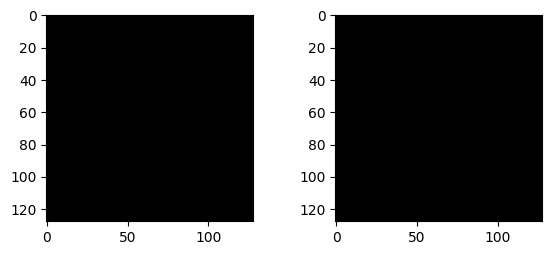

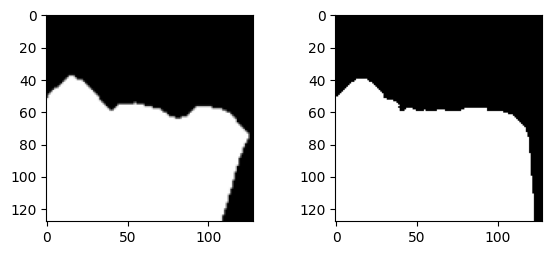

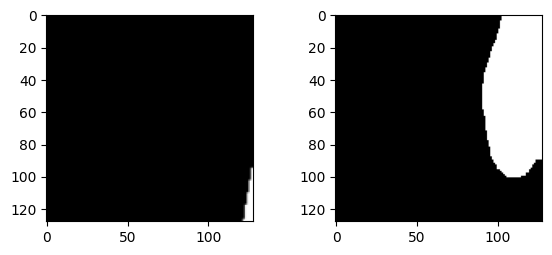

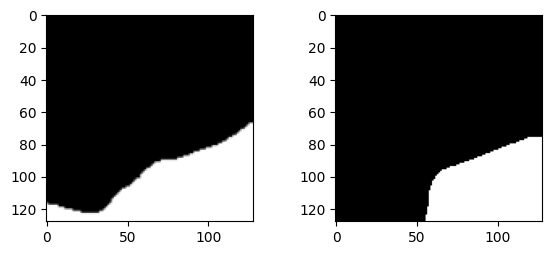

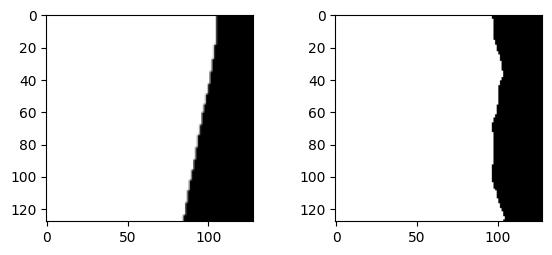

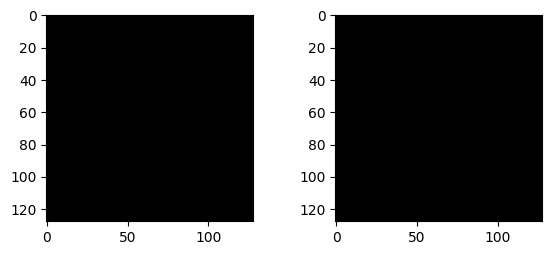

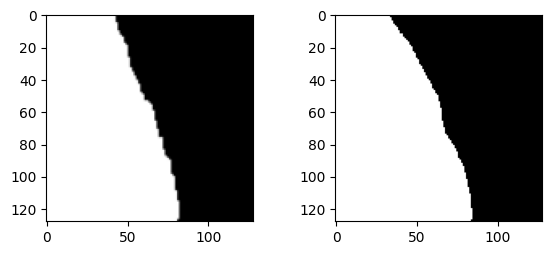

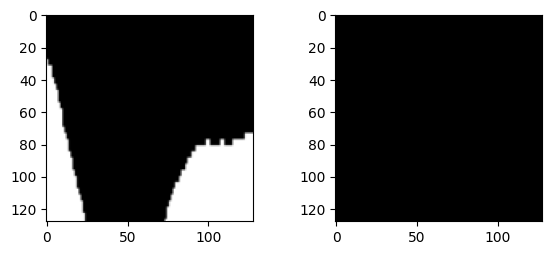

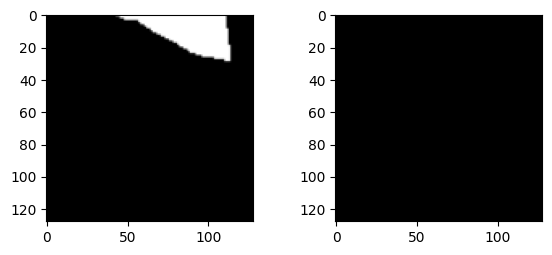

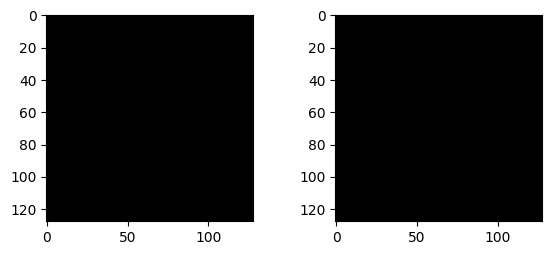

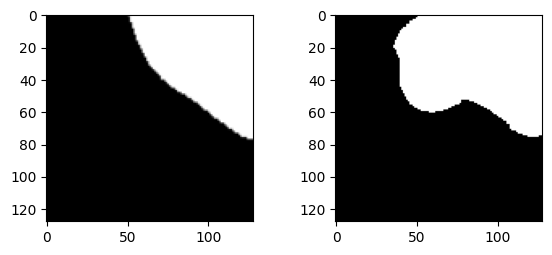

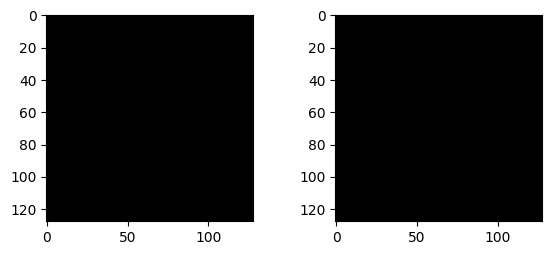

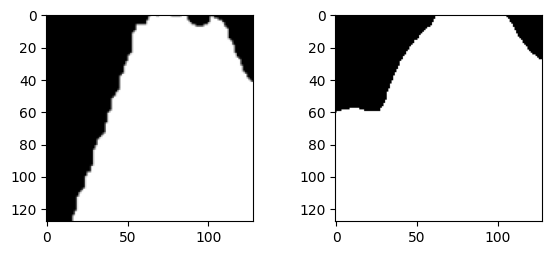

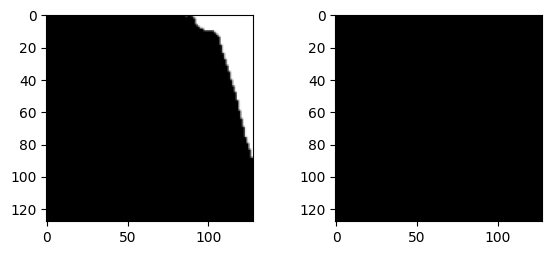

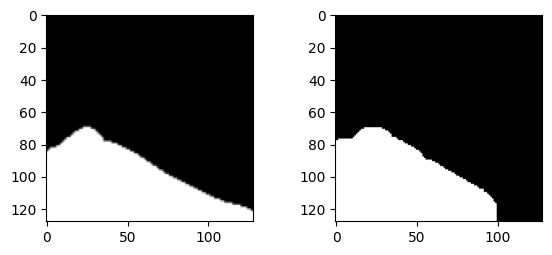

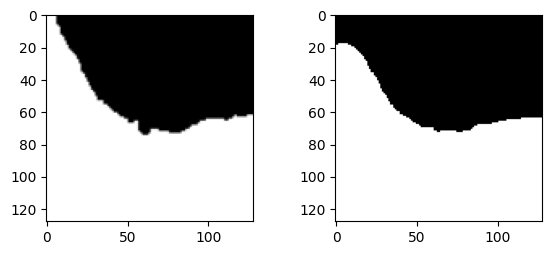

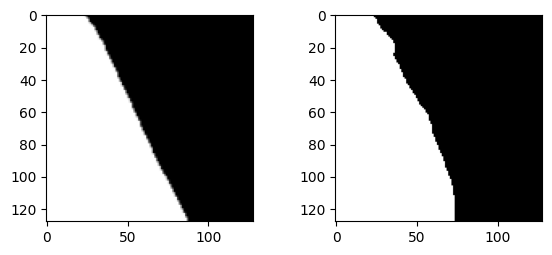

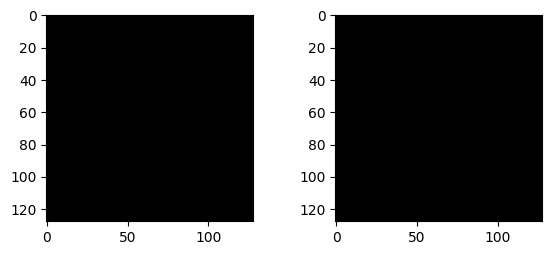

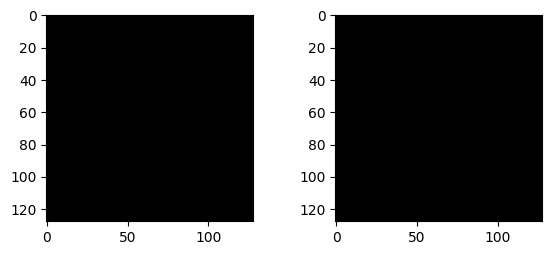

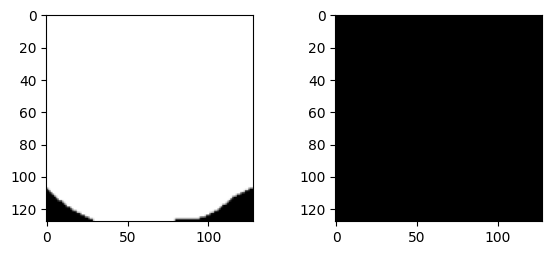

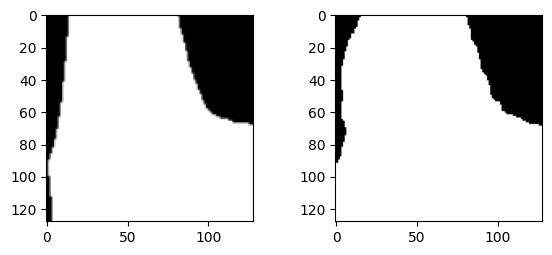

In [30]:
print("\n      Ground Truth            Predicted Value")

for i in range(1, 5, 1):
    ## Dataset for prediction
    x, y = valid_gen.__getitem__(i)
    result = model.predict(x)
    result = result > 0.4

    for i in range(len(result)):
        fig = plt.figure()
        fig.subplots_adjust(hspace=0.4, wspace=0.4)

        ax = fig.add_subplot(1, 2, 1)
        ax.imshow(np.reshape(y[i]*255, (image_size, image_size)), cmap="gray")

        ax = fig.add_subplot(1, 2, 2)
        ax.imshow(np.reshape(result[i]*255, (image_size, image_size)), cmap="gray")